# Необходимые сведения из линейной алгебры &mdash; 1 #
*Элементарная теория вероятности*

> 

## Предмет теории вероятностей ##

Предмет теории вероятностей &mdash; математический анализ случайных явлений

- отсутствует **детерминистическая регулярность**
- но присутствует **статистическая регулярность**

Предметом теории вероятностей является математический анализ случайных явлений &mdash; эмпирических феноменов, которые (при заданном «комплексе условий») могут быть охарактеризованы тем, что

- для них отсутствует *детерминистическая регулярность* (наблюдения над ними не всегда приводят к одним и тем же исходам)

и в то же самое время

- они обладают некоторой *статистической регулярностью* (проявляющейся в статистической устойчивости частот).

Поясним сказанное на классическом примере «честного» подбрасывания «правильной» монеты.
Ясно, что заранее невозможно с определенностью предсказать исход каждого подбрасывания.
Результаты отдельных экспериментов носят крайне нерегулярный характер (то «герб», то «решетка»), и кажется, что это лишает нас возможности познать какие-либо закономерности, связанные с этими экспериментами.
Однако, если провести большое число «независимых» подбрасываний, то можно заметить, что для «правильной» монеты будет наблюдаться вполне определенная статистической регулярность, проявляющаяся в том, что частота выпадания «герба» будет «близка» к $1/2$.

---

## Вероятностная модель ##

### 1. Множество исходов ###

Рассмотрим некоторый эксперимент, результаты которого описываются конечным числом различных *исходов*

$$ \omega_1, \dots , \omega_N. $$


Исходы $\omega_1, \dots , \omega_N$ будем также называть *элементарными событиями*, а их совокупность

$$ \Omega = \{ \omega_1, \dots , \omega_N \} $$

*пространством элементарных событий* или *пространством исходов*.

### Множество исходов ###

Рассмотрим некоторый эксперимент, результаты которого описываются конечным числом различных *исходов* $\omega_1, \dots , \omega_N$. Для нас несущественна реальная природа этих исходов, важно лишь то, что их число $N$ конечно.

Исходы $\omega_1, \dots , \omega_N$ будем также называть *элементарными событиями*, а их совокупность

$$ \Omega = \{ \omega_1, \dots , \omega_N \} $$

*пространством элементарных событий* или *пространством исходов*.

Выделение пространства элементарных событий представляет собой первый шаг в формулировании понятия *вероятностной модели* (вероятностной &laquo;теории&raquo;) того или иного эксперимента.

>**Примеры**
>
> - однократное подбрасывание монеты (пространство исходов состоит из двух точек: Г — «герб», Р — «решетка»);
> - n-кратное подбрасывание монеты;
> - выбор шаров с возвращением (упорядоченные и неупорядоченные выборки);
> - выбор шаров без возвращения (упорядоченные и неупорядоченные выборки).

### 2. Алгебра ###

Cобытия &mdash; элементы некоторого выделенного (не любого) набора подмножеств множества $\Omega$.

Набор подмножеств должен быть замкнут относительно обычных операций над событиями, т. е. чтобы *объединение*, *пересечение* и *дополнение* событий снова давало событие.

**Определение.** Множество $\mathcal{A}$, элементами которого являются подмножества множества $\Omega$ называется *алгеброй*, если оно удовлетворяет следующим условиям:

1. $\Omega \in \mathcal{A}$ (алгебра содержит достоверное событие);
2. если $A \in \mathcal{A}$, то $\overline{A} \in \mathcal{A}$ (вместе с любым множеством алгебра содержит противоположное к нему);
3. если $A \in \mathcal{A}$ и $B \in \mathcal{A}$, то $A \cup B \in \mathcal{A}$ (вместе с любыми двумя множествами алгебра содержит их объединение).

>**Примеры:**
>
>1. $\mathcal{A} = \{ \Omega, \emptyset \}$ &mdash; система, состоящая из $\Omega$ и пустого множества (так называемая тривиальная алгебра);
>2. $\mathcal{A} = \{ A, \overline{A}, \Omega, \emptyset \}$ &mdash; система, порожденная событием $A$;
>3. $\mathcal{A} = \{ A: A \subseteq \Omega \}$ &mdash; совокупность всех (включая и пустое множество $\emptyset$) подмножеств $\Omega$.

### Алгебра ###

Наряду с понятием пространства элементарных событий введём теперь важное понятие события, лежащее в основе построения всякой
вероятностной модели («теории») рассматриваемого эксперимента.

Мы собираемся определить набор подмножеств множества $\Omega$, которые будут называться событиями, и затем задать вероятность как функцию, определённую *только* на множестве событий.

Итак, событиями мы будем называть не любые подмножества $\Omega$, а лишь элементы некоторого выделенного набора подмножеств множества $\Omega$.
При этом необходимо позаботиться, чтобы этот набор подмножеств был замкнут относительно обычных операций над событиями, т. е. чтобы объединение, пересечение и дополнение событий снова давало событие.
Введём понятие алгебры множеств.

**Определение.** Множество $\mathcal{A}$, элементами которого являются подмножества множества $\Omega$ называется *алгеброй*, если оно удовлетворяет следующим условиям:

1. $\Omega \in \mathcal{A}$ (алгебра содержит достоверное событие);
2. если $A \in \mathcal{A}$, то $\overline{A} \in \mathcal{A}$ (вместе с любым множеством алгебра содержит противоположное к нему);
3. если $A \in \mathcal{A}$ и $B \in \mathcal{A}$, то $A \cup B \in \mathcal{A}$ (вместе с любыми двумя множествами алгебра содержит их объединение).

Из условий 1 и 2 следует, что пустое множество $\emptyset = \overline{\Omega}$ также содержится в $\mathcal{A}$, т. е. алгебра содержит и невозможное событие.

В качестве систем событий целесообразно рассматривать такие системы множеств, которые являются алгебрами. Именно такие системы событий мы и будем рассматривать далее.

Остановимся на некоторых примерах алгебр событий:

1. $\mathcal{A} = \{ \Omega, \emptyset \}$ &mdash; система, состоящая из $\Omega$ и пустого множества (так называемая тривиальная алгебра);
2. $\mathcal{A} = \{ A, \overline{A}, \Omega, \emptyset \}$ &mdash; система, порожденная событием $A$;
3. $\mathcal{A} = \{ A: A \subseteq \Omega \}$ &mdash; совокупность всех (включая и пустое множество $\emptyset$) подмножеств $\Omega$.

> **Упражнение.** Доказать, что если $\Omega$ состоит из $n$ элементов, то в множестве всех его подмножеств ровно $2^n$ элементов.

### 3. Вероятностная мера ###

Каждому элементарному событию (исходу, явлению) $\omega_i \in \Omega$, $i=1, \ldots, N$ можно приписать некоторый &laquo;вес&raquo;, обозначаемый $p(\omega_i)$ (или $p_i$), называемый *вероятностью* исхода $\omega_i$ и удовлетворяющий следующим условиям:

1. $0  \le p(\omega_i) \le 1$ (*неотрицательность*),
2. $p(\omega_1) + \ldots + p(\omega_N) = 1$ (*нормированность*).

Отправляясь от заданных вероятностей $p(\omega_i)$ исходов $\omega_i$ определим *вероятность* $\mathrm{P}(A)$ любого события $A \in \mathcal{F}$ по формуле

$$ \mathrm{P}(A) = \sum_{\{i:\omega_i \in A\}} p(\omega_i). $$

#### Свойства вероятностей ####

1. $\mathrm{P}(\emptyset) = 0$,
1. $\mathrm{P}(\Omega) = 1$,
1. $\mathrm{P}(A \cup B) = \mathrm{P}(A) + \mathrm{P}(B) - \mathrm{P}(A \cap B)$,
>**Упражнение.** Доказать, что если $\Omega$ состоит из $n$ элементов, то в множестве всех его подмножеств ровно $2^n$ элементов.

### Вероятностная мера ###

Пока мы сделали два первых шага к построению вероятностной модели эксперимента с конечным числом исходов: выделили пространство исходов $\Omega$ и некоторую систему $\mathcal{A}$ его подмножеств, образующих алгебру и называемых событиями.
Сделаем теперь следующий шаг, а именно припишем каждому элементарному событию (исходу, явлению) $\omega_i \in \Omega$, $i=1, \ldots, N$ некоторый &laquo;вес&raquo;, обозначаемый $p(\omega_i)$ (или $p_i$) и называемый *вероятностью* исхода $\omega_i$, который будем считать удовлетворяющим следующим условиям:

1. $0  \le p(\omega_i) \le 1$ (*неотрицательность*),
2. $p(\omega_1) + \ldots + p(\omega_N) = 1$ (*нормированность*).

Отправляясь от заданных вероятностей $p(\omega_i)$ исходов $\omega_i$ определим *вероятность* $\mathrm{P}(A)$ любого события $A \in \mathcal{A}$ по формуле
$$ \mathrm{P}(A) = \sum_{\{i:\omega_i \in A\}} p(\omega_i). $$

#### Свойства вероятностей ####

1. $\mathrm{P}(\emptyset) = 0$,
1. $\mathrm{P}(\Omega) = 1$,
1. $\mathrm{P}(A \cup B) = \mathrm{P}(A) + \mathrm{P}(B) - \mathrm{P}(A \cap B)$,
1. $\mathrm{P}(\overline{A}) = 1 - P(A)$.

### Вероятностное пространство ###

**Определение.** Принято говорить, что &laquo;вероятностное пространство&raquo;

$$ \left( \Omega, \mathcal{A}, \mathrm{P} \right), $$

где $\Omega = {\omega_1, \ldots, \omega_N}$, $\mathcal{A}$ — некоторая алгебра подмножеств $\Omega$ и $\mathrm{P} = \{ \mathrm{P}(A); A \in \mathcal{A} \}$,
определяет вероятностную модель эксперимента с пространством исходов (элементарных событий) $\Omega$ и алгеброй событий $\mathcal{A}$.

### Замечания ###

При построении вероятностных моделей в конкретных ситуациях выделение пространства элементарных событий $\Omega$ и алгебры событий $\mathcal{A}$, как правило, не является сложной задачей. При этом в элементарной теории вероятностей в качестве алгебры $\mathcal{A}$ обычно берется алгебра *всех* подмножеств $\Omega$. Труднее обстоит дело с вопросом о том, как задавать вероятности элементарных событий. В сущности, ответ на этот вопрос лежит вне рамок теории вероятностей, и мы его подробно не рассматриваем, считая, что основной нашей задачей является не вопрос о том, как приписывать исходам те или иные вероятности, а *вычисление* вероятностей
сложных событий (событий из $\mathcal{A}$) по вероятностям элементарных событий.

С математической точки зрения ясно, что в случае конечного пространства элементарных событий с помощью приписывания исходам $\omega_1, \ldots , \omega_N$ неотрицательных чисел $p_1, \ldots , p_N$, удовлетворяющих условию $p_1 + \ldots + p_N = 1$, мы получаем все мыслимые (конечные) вероятностные пространства.

*Правильность* же назначенных для конкретной ситуации значений $p_1, \ldots , p_N$ может быть до известной степени проверена с помощью *закона больших чисел*, согласно которому в длинных сериях &laquo;независимых&raquo; экспериментов, происходящих при одинаковых условиях, частоты появления элементарных событий &laquo;близки&raquo; к их вероятностям.

---

## Некоторые классические модели и распределения ##

### Биномиальное распределение ###

Предположим, что монета подбрасывается $n$ раз.
Пространство всех исходов имеет следующую структуру:

$$ \Omega= \left\{ \omega: \omega = (a_1, \ldots, a_n), \quad a_i = 0 \; \mathrm{или} \; 1 \right\}, $$

где $a_i = 1$ в случае появления «герба» («успех») и $a_i = 0$ в случае появления «решки» («неуспех»).

Припишем каждому элементарному событию $\omega = (a_1, \ldots, a_n)$ вероятность $p(\omega) = p^{\sum a_i} q^{n-\sum a_i}$,
где $p + q = 1$.

Пространство $\Omega$ вместе с системой $\mathcal{A}$ всех его подмножеств и вероятностями $\mathrm{P}(A) = \sum\limits_{\omega \in A}p(\omega), \; A \in \mathcal{A}$ определяет вероятностную модель, описывающую $n$-кратное подбрасывание монеты.

Введём в рассмотрение события означающие, что произойдет в точности $k$ &laquo;успехов&raquo;. 

$$ A_k = \left\{\omega: \omega=(a_1, \ldots, a_n), a_1 + \ldots + a_n = k\right\}, \quad k = 0, 1, \ldots, n $$

Вероятность события $A_k$ равна $\mathrm{P}(A_k) = C_n^k p^k q^{n-k}$, причём $\sum\limits_{k=0}^n \mathrm{P}(A_k) = 1$.

Набор вероятностей $\{\mathrm{P}(A_0), \ldots,\mathrm{P}(A_n)\}$ называется *биномиальным распределением* (числа &laquo;успехов&raquo; в выборке объёма $n$).

### Биномиальное распределение ###

Предположим, что монета подбрасывается $n$ раз и результат наблюдений записывается в виде упорядоченного
набора $(a_1, \ldots, a_n)$, где $a_i = 1$ в случае появления «герба» («успех») и $a_i = 0$ в случае появления «решетки» («неуспех»).
Пространство всех исходов имеет следующую структуру:
$$ \Omega= \left\{ \omega: \omega = (a_1, \ldots, a_n), \quad a_i = 0 \; \mathrm{или} \; 1 \right\}. $$

Припишем каждому элементарному событию $\omega = (a_1, \ldots, a_n)$ вероятность (&laquo;вес&raquo;)
$$ p(\omega) = p^{\sum a_i} q^{n-\sum a_i}, $$
где неотрицательные числа $p$ и $q$ таковы, что $p + q = 1$.

Итак, пространство $\Omega$ вместе с системой $\mathcal{A}$ всех его подмножеств и вероятностями $\mathrm{P}(A) = \sum\limits_{\omega \in A}p(\omega), \; A \in \mathcal{A}$ (в частности, $\mathrm{P}(\{\omega\}) = p(\omega), \; \omega \in \Omega$) определяет некоторую вероятностную модель.
Естественно назвать её *вероятностной моделью, описывающей $n$-кратное подбрасывание монеты*.

Введём в рассмотрение события
$$ 
    A_k = \left\{\omega: \omega=(a_1, \ldots, a_n), a_1 + \ldots + a_n = k\right\}, \quad k = 0, 1, \ldots, n,
$$
означающие, что произойдет в точности $k$ &laquo;успехов&raquo;. Тогда вероятность события $A_k$ равна
$$ \mathrm{P}(A_k) = C_n^k p^k q^{n-k}, $$
причём $\sum\limits_{k=0}^n \mathrm{P}(A_k) = 1$.

Набор вероятностей $\{\mathrm{P}(A_0), \ldots,\mathrm{P}(A_n)\}$ называется *биномиальным распределением* (числа &laquo;успехов&raquo; в выборке объёма $n$).

### Гипергеометрическое распределение ###

Рассмотрим урну, содержащую $N$ шаров, из которых $M$ шаров имеют белый цвет.
Предположим, что осуществляется выбор без возвращения объёма $n < N$.
Вероятность события $B_m$, состоящего в том, что $m$ шаров из выборки имеют белый цвет равна

$$ \mathrm{P}(B_m) = \dfrac{C_M^m C_{N-M}^{n-m}}{C_N^n}. $$

Набор вероятностей $\{\mathrm{P}(B_0), \ldots,\mathrm{P}(B_n)\}$ носит название многомерного гипергеометрического распределения.

---

## Оценка максимального правдоподобия ##
*Задача об оценке генеральной совокупности по выборке*

Пусть $N$ &mdash; размер некоторой популяции, который требуется оценить &laquo;минимальными средствами&raquo; без простого пересчета всех элементов этой совокупности.

1. Выберем некоторое число $M$, элементов популяции и пометим их.
2. Возвратим их в основную совокупность и предположим, что они &laquo;хорошо перемешаны&raquo; с немаркированными элементами.
3. После этого возьмём из &laquo;перемешанной&raquo; популяции $n$ элементов.
4. Пусть среди них $m$ элементов оказались маркированными.

Вероятность $\mathrm{P}(B_m(N))$ задается формулой гипергеометрического распределения:
$$
    \mathrm{P}(B_m(N)) = \frac{C_M^m C_{N-M}^{n-m}}{C_N^n}. \tag{1}\label{eq:prob}
$$

Нам известны числа $M$, $n$ и $m$, а $N$ (размер популяциии) &mdash; нет, его требуется оценить.

Пусть требуется оценить количество рыб в озере.
Пусть $M=1000$, $n=1000$, а $m=100$.

Тогда всё, что нам достоверно известно о размере популяции рыб, это $N \ge n + M - m = 1900$.
Вообще говоря, не исключено, что в озере их ровно $1900$.
Вероятность соответствующего события равна
$$
    \mathrm{P}(B_{100}(1900)) = \frac{C_{1000}^{100} C_{900}^{900}}{C_{1900}^{1000}} = \frac{(1000!)^2}{100! \, 1900!} \sim 10^{-430}.
$$

Рассмотрим $N = 10^6$. Тогда $\mathrm{P}(B_{100}(10^6)) \sim 10^{-163}$.

Для каждого частного набора наблюдений $M$, $n$ и $m$ значение $N$, при котором $\mathrm{P}(B_m(N))$ максимально, обозначается через $\hat{N}$ и называется оценкой **максимального правдоподобия**.

Можно показать, что наиболее правдоподобное $\hat{N}$ определяется формулой $\hat{N} = \left[\dfrac{Mn}{m}\right]$, где $[\cdot]$ &mdash; целая часть.

В нашем примере оценкой максимального правдоподобия является число $\hat{N} = 10^4$ ($\mathrm{P}(B_{100}(10^4)) \approx 0.044$).

Пусть $N$ &mdash; размер некоторой популяции, который требуется оценить &laquo;минимальными средствами&raquo; без простого пересчета всех элементов этой совокупности.
Подобного рода вопрос интересен, например, при оценке числа жителей в той или иной стране, городе и т. д.

В 1786 г. Лаплас для оценки числа $N$ жителей Франции предложил следующий метод.
Выберем некоторое число, скажем, $M$, элементов популяции и пометим их. Затем возвратим их в основную совокупность и предположим, что они &laquo;хорошо перемешаны&raquo; с немаркированными элементами.
После этого возьмем из &laquo;перемешанной&raquo; популяции $n$ элементов.
Пусть среди них $m$ элементов оказались маркированными.

Cоответствующая вероятность $\mathrm{P}(B_m(N))$ задается формулой гипергеометрического распределения:
$$
    \mathrm{P}(B_m(N)) = \frac{C_M^m C_{N-M}^{n-m}}{C_N^n}. \tag{1}\label{eq:prob}
$$

Считая $M$, $n$ и $m$ фиксированными, найдем максимум этой вероятности по $N$, т. е. найдем &laquo;наиболее правдоподобный&raquo; объём всей популяции, приводящий (при заданных $M$ и $n$) к тому, что число маркированных элементов оказалось равным $m$. Так полученная оценка $\hat{N}$ для $N$ называется оценкой максимального правдоподобия.

>*Задание.* Показать, что наиболее правдоподобное $\hat{N}$ определяется формулой ($[\cdot]$ &mdash; целая часть):
$$ \hat{N} = \left[\dfrac{Mn}{m}\right]. \tag{2}\label{eq:max} $$

Применим этот подход для оценки количества рыб в озере. Пусть, например, $M=1000$, $n=1000$, а $m=100$.
Тогда всё, что нам достоверно известно количестве рыб, это $N \ge n + M - m = 1900$.
Вообще говоря, не исключено, что в озере их ровно $1900$.
Однако, отправляясь от этой гипотезы, мы придём к выводу, что случилось событие фантастически малой вероятности.
Действительно, вероятность того, что выборка объёмом $n=1000$ из генеральной совокупности объёма $N=1900$ будет содержать $m=100$ маркированных объектов, если общее число маркированных объектов $M=1000$, по формуле $\eqref{eq:prob}$ равна
$$
    \mathrm{P}(B_{100}(1900)) = \frac{C_{1000}^{100} C_{900}^{900}}{C_{1900}^{1000}} = \frac{(1000!)^2}{100! \, 1900!} \sim 10^{-430}.
$$

Аналогичное рассуждение заставляет нас откинуть гипотезу о том, что $N$ очень велико, скажем равно миллиону ($\mathrm{P}(B_{100}(10^6)) \sim 10^{-163}$).
Такие рассуждения приводят нас к отысканию такого $N$, при котором $\mathrm{P}(B_m(N))$ является наибольшим, так как при этом значении $N$ наблюдённый результат имеет наибольшую вероятность.
Для каждого частного набора наблюдений $M$, $n$ и $m$ значение $N$, при котором $\mathrm{P}(B_m(N))$ максимально, обозначается через $\hat{N}$ и называется оценкой *максимального правдоподобия*.



В нашем примере оценкой для количества рыб в озере является число $\hat{N} = 10^4$. Нетрудно посчитать, что вероятность соотвествующего события равна $\mathrm{P}(B_{100}(10^4)) \approx 0.044$.

Обозначим вероятность события $B_{100}(N)$ через $P(N)$ и построим её зависимость от $N$.

In [1]:
# Imports
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

import sys
sys.path.append('./modules')
import graph_support

In [2]:
%%html
<style>
    .container.slides .celltoolbar, .container.slides .hide-in-slideshow {display: None ! important;}
</style>

In [3]:
# Generate data
X = np.arange(7000, 14000, 1)
Y = hypergeom.pmf(100, X, 1000, 1000)

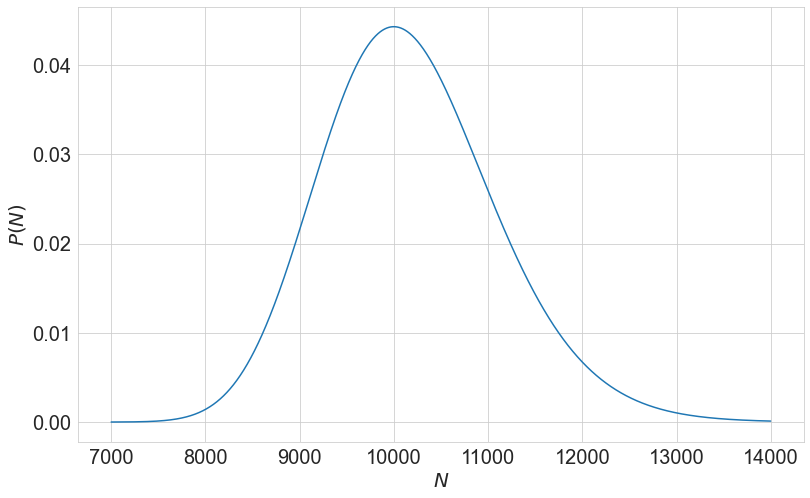

In [4]:
graph_support.hide_code_in_slideshow()

# Show data
plt.figure(figsize=(13, 8))
plt.plot(X, Y, '-', label='data: $(x,y)$')
plt.xlabel('$N$')
plt.ylabel('$P(N)$')
# plt.title('Noisy data samples from linear line')
plt.show()

---

## Условная вероятность. Независимость ##

### Понятие условной вероятности ###

Понятие *вероятности* события дает нам возможность ответить на вопрос такого типа: если урна содержит $M$ шаров, из которых $M_1$ шаров белого цвета и $M_2$ &mdash; чёрного, то какова вероятность $\mathrm{P}(A)$ события $A$, состоящего в том, что вытащенный шар имеет белый цвет?  
В случае классического подхода $\mathrm{P}(A) =M_1/M$.

Вводимое ниже понятие условной вероятности позволяет отвечать на вопрос следующего типа: какова вероятность того, что второй извлеченный шар белого цвета (событие $B$), при условии, что первый шар также имеет белый цвет (событие $A$)? Рассматривается выбор без возвращения.

Естественно здесь рассуждать так: если первый извлеченный шар имел белый цвет, то перед вторым извлечением мы имеем урну с $M-1$ шаром, из которых $M_1 - 1$ шаров имеют белый цвет, а $M_2$ &mdash; чёрный; поэтому интуитивно представляется целесообразным считать, что интересующая нас (условная) вероятность равна $\dfrac{M_1-1}{M-1}$.

Дадим теперь определение условной вероятности, согласующееся с интуитивными представлениями о ней.

**Определение.** Условной вероятностью события $B$ при условии события $A$ с $\mathrm{P}(A)>0$ (обозначение: $\mathrm{P}(B|A)$) называется величина
$$ \dfrac{\mathrm{P}(AB)}{\mathrm{P}(A)}. $$

### Свойства условной вероятности ###

1. $\mathrm{P}(A|A) = 1$,
1. $\mathrm{P}(\emptyset|A) = 0$,
1. $\mathrm{P}(B|A) = 1$, $B \supseteq A$,
1. $\mathrm{P}(B_1 + B_2|A) = \mathrm{P}(B_1|A) + \mathrm{P}(B_2|A)$.

> **Пример.** Рассмотрим семьи, имеющие двух детей. Спрашивается, какова вероятность того, что в семье оба ребенка мальчики, в предположении, что:
1. старший ребенок &mdash; мальчик;
2. по крайней мере один из детей &mdash; мальчик?

### Формула полной вероятности ###

Рассмотрим *полную группу несовмстимых событий* $\mathcal{D} = \{A_1, \dots, A_n\}$. Имеет место **формула полной вероятности**
$$ \mathrm{P}(B) = \sum_{i=1}^n \mathrm{P}(B|A_i) \mathrm{P}(A_i). $$

> **Пример.** В урне имеется $M$ шаров, среди которых $m$ &laquo;счастливых&raquo;. Спрашивается, какова вероятность извлечь на втором шаге &laquo;счастливый&raquo; шар (предполагается, что качество первого извлеченного шара неизвестно).

Справедлива **формула умножения вероятностей**:
$$ \mathrm{P}(AB) = \mathrm{P}(B|A) \mathrm{P}(A). $$

По индукции:
$$ \mathrm{P}(A_1, \dots, A_n) = \mathrm{P}(A_1) \mathrm{P}(A_2|A_1) \dots \mathrm{P}(A_n|A_1 \dots A_{n-1}). $$

### Независимость ###

**Определение.** События $A$ и $B$ называются *независимыми* или *статистически независимыми* (относительно вероятности $\mathrm{P}$), если
$$ \mathrm{P}(AB) = \mathrm{P}(A) \cdot \mathrm{P}(B). $$

### Теорема Байеса ###

Из формул $\mathrm{P}(B|A) = \dfrac{\mathrm{P}(AB)}{\mathrm{P}(A)}$ и $\mathrm{P}(A|B) = \dfrac{\mathrm{P}(AB)}{\mathrm{P}(B)}$ получаем **формулу Байеса**:
$$ \mathrm{P}(A|B) = \dfrac{\mathrm{P}(B|A) \mathrm{P}(A)}{\mathrm{P}(B)}. $$

Если события $A_1, \dots, A_n$ образубт разбиение $\Omega$, то из формул полной вероятности и Байеса следует **теорема Байеса**:
$$ \mathrm{P}(A_i|B) = \frac{\mathrm{P}(B|A_i) \mathrm{P}(A_i)}{\sum_{j=1}^{n} \mathrm{P}(A_j) \mathrm{P}(B|A_j)}. $$

В статистических применениях события $A_1, \dots, A_n$ образующие &laquo;полную группу событий&raquo; ($A_1 + \dots + A_n = \Omega$), часто называют &laquo;гипотезами&raquo;, а $\mathrm{P}(A_i)$ &mdash; *априорной* вероятностью гипотезы $A_i$.
Условная вероятность $\mathrm{P}(A_i|B)$ трактуется как *апостериорная* вероятность гипотезы $A_i$ после наступления события $B$.

> **Пример.**
Пусть в урне находятся две монеты: $A_1$ &mdash; симметричная монета с вероятностью «герба» Г, равной 1/2, и $A_2$ &mdash; несимметричная монета с вероятностью «герба» Г, равной 1/3. Наудачу вынимается и подбрасывается одна из монет. Предположим, что выпал герб. Спрашивается, какова вероятность того, что выбранная монета симметрична.

---

## Случайные величины и их распределения ##

Пусть и $(\Omega, \mathcal{A}, \mathrm{P})$ &mdash; вероятностная модель некоторого эксперимента с *конечным* числом исходов $N(\Omega)$ и алгеброй $\mathcal{A}$ всех подмножеств $\Omega$.

**Определение.** Всякая числовая функция $\xi = \xi(\omega)$, определённая на (конечном) пространстве элементарных событий $\Omega$, будет называться (простой) *случайной величиной*.

Поскольку в рассматриваемом случае $\Omega$ состоит из конечного числа точек, то множество значений $X$ случайной величины $\xi$ также конечно.
Пусть $X = \{x_i, \ldots, x_m\}$, где (различными) числами $x_i, \ldots, x_m$ исчерпываются все значения $\xi$.

Рассмотрим функцию вероятности $P_\xi(\cdot)$, индуцируемую случайной величиной $\xi$ по формуле
$$ P_\xi(B) = \mathrm{P}\{\omega: \xi(\omega) \in B\}. $$

Ясно, что значения этих вероятностей полностью определяются вероятностями
$$ P_\xi(x_i) = \mathrm{P}\{\omega: \xi(\omega) = x_i\}, \quad x_i \in X. $$

Набор чисел $\{ P_\xi(x_1), \ldots , P_\xi(x_m) \}$ называется *распределением вероятностей* случайной величины $\xi$.

**Определение.** Пусть $x \in \mathbb{R}^1$. Функция
$$ F_\xi(x)  = \mathrm{P} \left\{ \omega: \xi(\omega) \le x \right\} $$
называется *функцией распределения* случайной величины $\xi$.

**Определение.** Случайные величины $\xi_1, \ldots, \xi_r$ называются *независимыми* (в совокупности), если для любых $x_1, \ldots, x_r \in X$
$$
    \mathrm{P}\left\{ \xi_1=x_1, \ldots, \xi_r=x_r \right\} =
    \mathrm{P}\left\{ \xi_1=x_1\right\} \cdot \ldots \cdot \mathrm{P}\left\{\xi_r=x_r \right\}.
$$

---

## Числовые характеристики случайных величин ##

### Математическое ожидание ###

**Определение.** *Математическим ожиданием* случайной величины $\xi = \xi(\omega)$ называется число
$$
    \mathrm{E}\xi = \sum\limits_{i=1}^k x_i \mathrm{P}(\xi=x) = \sum\limits_{i=1}^k x_i P_\xi(x_i).
$$


**Свойства математического ожидания:**

1. Если $\xi \ge 0$, то $\mathrm{E}\xi \ge 0$.
2. $\mathrm{E}(a\xi +b\eta) = a\mathrm{E}\xi +b\mathrm{E}\eta$, $\hspace{0.5em}$ $a$, $b$ &mdash; постоянные (*линейность*).
3. Если $\xi \ge \eta$, то $\mathrm{E}\xi \ge \mathrm{E}\eta$.
4. $|\mathrm{E}\xi| \le \mathrm{E}|\xi|$.
5. Если $\xi$ и $\eta$ независимы, то $\mathrm{E}\xi\eta = \mathrm{E}\xi \cdot \mathrm{E}\eta$.
6. $(\mathrm{E}|\xi\eta|)^2 \le \mathrm{E}\xi^2 \cdot \mathrm{E}\eta^2$ (*неравенство Коши&ndash;Буняковского&ndash;Шварца*).

### Дисперсия ###

**Определение.** *Дисперсией* случайной величины $\xi$ называется величина
$$ \mathrm{D} \xi = \mathrm{E} \left( \xi - \mathrm{E} \xi \right)^2. $$

Величина $\sigma_\xi = +\sqrt{\mathrm{D} \xi}$ называется *стандартным отклонением* значений случайной величины $\xi$ от её среднего значения $\mathrm{E} \xi$.

**Свойства дисперсии:**

1. Дисперсию случайной величины $\xi$ можно вычислить как разность математического ожидания кавдрата величины и квадрата математического ожидания: $\mathrm{D}\xi = \mathrm{E} \xi^2 - \left( \mathrm{E} \xi \right)^2$.
2. $\mathrm{D}\xi \ge 0$.
3. $\mathrm{D}(a + b\xi) = b^2 \mathrm{D}\xi$, $\hspace{0.5em}$ $a$, $b$ &mdash; постоянные.
4. $\mathrm{D}(\xi + \eta) = \mathrm{E} \left[ (\xi-\mathrm{E}\xi) + (\eta-\mathrm{E}\eta) \right]^2 = \mathrm{D}\xi + \mathrm{D}\eta + 2\mathrm{E}(\xi-\mathrm{E}\xi)(\eta-\mathrm{E}\eta)$


**Определение.** Пусть $\xi$ и  $\eta$ &mdash; две случайные величины. Их *ковариацией* называется величина
$$
    \mathrm{cov}(\xi, \eta) = \mathrm{E} (\xi-\mathrm{E}\xi)(\eta-\mathrm{E}\eta).
$$

С учётом введённого обозначения для ковариации находим, что
$$ \mathrm{D}(\xi+\eta) = \mathrm{D}\xi  + \mathrm{D}\eta +  2\mathrm{cov}(\xi, \eta).$$

Если $\mathrm{cov}\left( \xi, \eta \right) = 0$, то говорят, что случайные величины $\xi$ и $\eta$ *некоррелированы*. \
Если $\xi$ и $\eta$ некоррелированы, то дисперсия суммы $\mathrm{D}(\xi+\eta)$ равна сумме дисперсий:
$$ \mathrm{D}(\xi+\eta) = \mathrm{D}\xi + \mathrm{D}\eta. $$




**Замечание.** Из некоррелированности $\xi$ и $\eta$, вообще говоря, не следует их независимость. Проиллюстрируем этот факт следующим примером.

> **Пример.** Пусть случайная величина $\alpha$ принимает значения 0, $\pi/2$ и $\pi$ с вероятностями 1/3. Рассмотрим две случайные величины $\xi = \sin \alpha$ и $\eta = \cos \alpha$. \
Величины $\xi$ и $\eta$ некоррелированы, однако они не только зависимы относительно вероятности, но и *функционально зависимы*: $\xi^2 + \eta^2 = 1$.

### Коэффициент корреляции ###

**Определение.** Если $\mathrm{D}\xi > 0$, $\mathrm{D}\eta > 0$, то величина
$$
    \rho(\xi, \eta) = \dfrac{\mathrm{cov}(\xi, \eta)}{\sqrt{\mathrm{D}\xi \cdot \mathrm{D}\eta}} = \dfrac{\mathrm{cov}(\xi, \eta)}{\sigma_\xi \cdot \sigma_\eta}
$$
называется *коэффициентом корреляции* случайных величин $\xi$ и $\eta$.

Eсли $\rho(\xi, \eta) = \pm 1$, то величины $\xi$ и $\eta$ линейно зависимы:
$$ \eta =a \xi + b, $$
где $a>0$, если $\rho(\xi, \eta) = 1$, $a<0$, если $\rho(\xi, \eta) = -1$.

**Определение.** Говорят, что $\xi$ и $\eta$ отрицательно коррелированы, если $\rho(\xi, \eta) < 0$; положительно коррелированы, если $\rho(\xi, \eta) > 0$; некоррелированы, если $\rho(\xi, \eta) = 0$.

---

## Оптимальная оценка случайных величин ##

Рассмотрим две случайные величины $\xi$ и $\eta$. Предположим, что наблюдению подлежит лишь случайная величина $\xi$.
Если величины $\xi$ и $\eta$ коррелированы, то можно ожидать, что знание значений $\xi$ позволит вынести некоторые суждения и о значениях ненаблюдаемой величины $\eta$.

Всякую функцию $f = f(\xi)$ от $\xi$ будем называть *оценкой* для $\eta$.
Будем говорить также, что *оценка* $f^\ast = f^\ast(\xi)$ *оптимальна в среднеквадратическом смысле*, если
$$ \mathrm{E}(\eta − f^\ast(\xi))^2 = \inf_f \mathrm{E}(\eta − f(\xi))^2. $$

Покажем, как найти оптимальную оценку в классе *линейных* оценок $\lambda(\xi) = a + b\xi$.
Для этого рассмотрим функцию $g(a, b) = \mathrm{E}(\eta − (a+b\xi))^2$.
Дифференцируя $g(a, b)$ по $a$ и $b$, получаем
$$
\begin{split}
    \frac{\partial g(a, b)}{\partial a} &= −2 \mathrm{E} \left[ \eta − (a+b\xi) \right], \\
    \frac{\partial g(a, b)}{\partial b} &= −2 \mathrm{E} \left[ (\eta − (a+b\xi))\xi \right],
\end{split}
$$
откуда, приравнивая производные к нулю, находим, что *оптимальная* в среднеквадратическом смысле *линейная* оценка есть $\lambda^\ast (\xi) = a^\ast + b^\ast \xi$, где
$$
    a^\ast = \mathrm{E}\eta − b^\ast\mathrm{E}\xi, \quad b^\ast = \frac{\mathrm{cov}(\xi, \eta)}{\mathrm{D}\xi}.
$$

Иначе говоря,
$$
    \lambda^\ast(\xi) = \mathrm{E}\eta + \frac{\mathrm{cov}(\xi, \eta)}{\mathrm{D}\xi} (\xi - \mathrm{E}\xi).
$$

Величина $\mathrm{E}(\eta − \lambda^\ast(\xi))^2$ называется *среднеквадратической ошибкой* оценивания.
Простой подсчёт показывает, что эта ошибка равна
$$
\Delta^\ast = \mathrm{E}(\eta − \lambda^\ast(\xi))^2 = \mathrm{D}\eta − \frac{\mathrm{cov}^2(\xi, \eta)}{\mathrm{D}\xi} = \mathrm{D}\eta \cdot [1 - \rho^2(\xi, \eta)].
$$

Таким образом, чем больше по модулю коэффициент корреляции $\rho(\xi, \eta)$ между $\xi$ и $\eta$, тем меньше среднеквадратическая ошибка оценивания $\Delta^\ast$. В частности, если $|\rho(\xi, \eta)|=1$, то $\Delta^\ast = 0$. Если же случайные величины $\xi$ и $\eta$ не коррелированы (т. е. $\rho(\xi, \eta)=0$), то $\lambda^\ast(\xi) = \mathrm{E}\eta$. Таким образом, в случае отсутствия корреляции между $\xi$ и $\eta$ лучшей оценкой $\eta$ по $\xi$ является просто $\mathrm{E}\eta$.

---

## Литература ##

1. Strang, Gilbert. Linear algebra and learning from data. Wellesley-Cambridge Press, 2019. 432 p.


## Материалы ##

### Схема Бернулли ###

**Определение.** *Схемой Бернулли* называется последовательность независимых в совокупности испытаний, в каждом из которых возможны лишь два исхода &mdash; &laquo;успех&raquo; и &laquo;неудача&raquo;, при этом успех в одном испытании происходит с вероятностью $p \in (0, 1)$, а неудача &mdash; с вероятностью $q = 1 - p$.